In [1]:
# Data manipulation libraries

import pandas as pd
import numpy as np

#Machine learning models and evalutaion libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import sklearn.model_selection as cross_validation
from sklearn.model_selection import cross_val_score

# Data preprocesiing and visualisation libraries
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score

# Data Loading

In [2]:
# Data Loading

DryBean_data = pd.read_excel('/Users/Shreeramyaa/Desktop/Machine Learning/DryBeanDataset/Dry_Bean_Dataset.xlsx')

# Data Check

DryBean_data['ID']=DryBean_data.index
DryBean_data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,ID
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,1
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,2
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,3
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON,13606
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON,13607
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON,13608
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON,13609


In [3]:
DryBean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
 17  ID          

In [4]:
DryBean_data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
ID                 0
dtype: int64

In [5]:
DryBean_data.duplicated().sum()

0

In [6]:
DryBean_data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ID
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,6805.000000
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366,3929.301592
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,0.000000
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703,3402.500000
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386,6805.000000
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883,10207.500000
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733,13610.000000


# Exploratory Data Analysis

In [7]:
DryBean_data.shape

(13611, 18)

In [8]:
DryBean_data["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

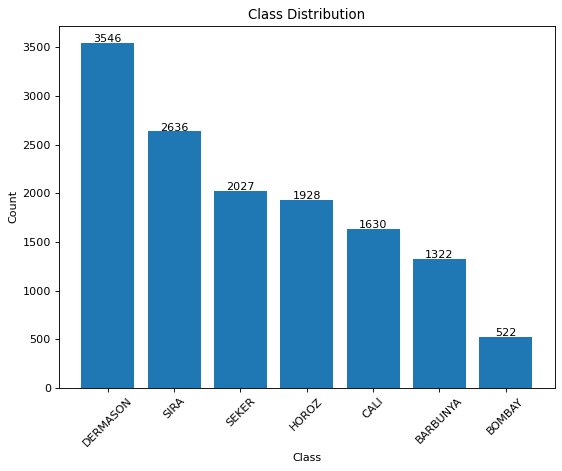

In [9]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

class_counts = DryBean_data['Class'].value_counts()
labels = class_counts.index.tolist()
sizes = class_counts.values.tolist()

ax.bar(labels, sizes)
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class Distribution')

# Add count labels above each bar
for i, v in enumerate(sizes):
    ax.text(i, v + 10, str(v), ha='center')

plt.xticks(rotation=45)
plt.show()

In [10]:
Derma_df=DryBean_data[DryBean_data['Class']=='DERMASON']
Sira_df=DryBean_data[DryBean_data['Class']=='SIRA']
Seker_df=DryBean_data[DryBean_data['Class']=='SERKAN']
Horoz_df=DryBean_data[DryBean_data['Class']=='HOROZ']
Cali_df=DryBean_data[DryBean_data['Class']=='CALI']
Barb_df=DryBean_data[DryBean_data['Class']=='BARBUNYA']
Bombay_df=DryBean_data[DryBean_data['Class']=='BOMBAY']

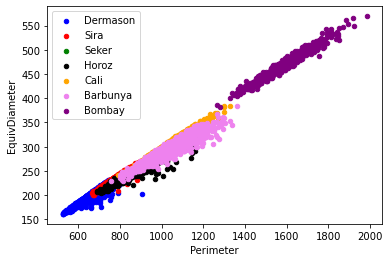

In [11]:

def plot_scatter(data, x, y, color, label):
    axes = None
    for class_name, class_data in data.items():
        axes = class_data.plot(kind='scatter', x=x, y=y, color=color[class_name], label=class_name, ax=axes)
    plt.show()

# Define the data dictionary containing class names as keys and corresponding dataframes as values
data = {
    'Dermason': Derma_df,
    'Sira': Sira_df,
    'Seker': Seker_df,
    'Horoz': Horoz_df,
    'Cali': Cali_df,
    'Barbunya': Barb_df,
    'Bombay': Bombay_df
}

# Define the colors for each class
colors = {
    'Dermason': 'blue',
    'Sira': 'red',
    'Seker': 'green',
    'Horoz': 'black',
    'Cali': 'orange',
    'Barbunya': 'violet',
    'Bombay': 'purple'
}

# Call the function to plot the scatter plots
plot_scatter(data, 'Perimeter', 'EquivDiameter', colors, 'Class')

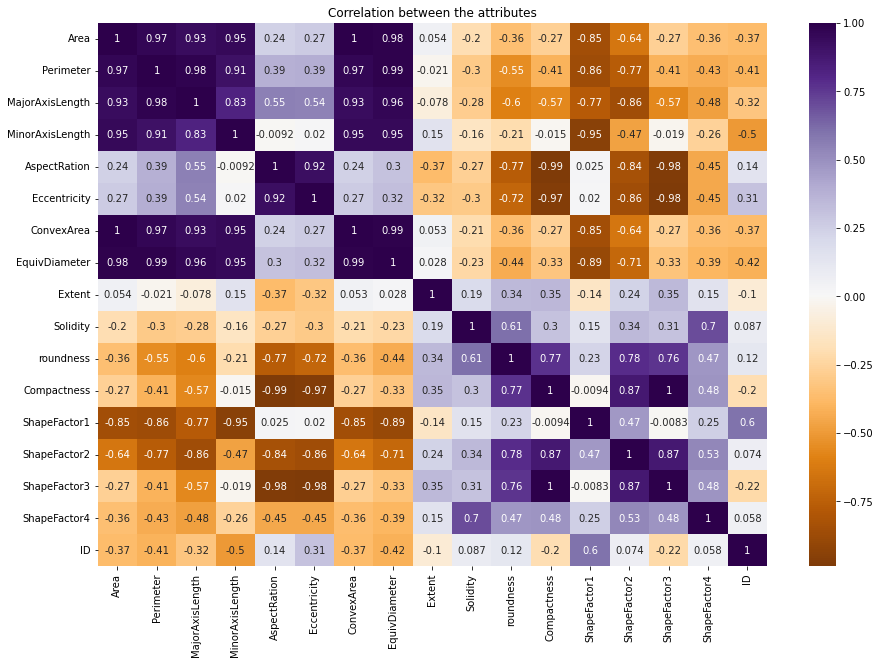

In [12]:
#using the in-built function and finding the correlation between variables.
df_corr = DryBean_data.corr(method ='pearson')

#plotting the heatmap for better visualisation
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr,cmap = "PuOr", mask=np.zeros_like(df_corr, dtype=bool),annot=True)
plt.title('Correlation between the attributes')
plt.show()

In [13]:
ids = DryBean_data.iloc[:, -1] #ids

In [14]:
# Preprocess the data
# Assuming the last column is 'label' that includes the types of beans
X = DryBean_data.iloc[:, :-2]  # Features
y = DryBean_data.iloc[:, -2]  # Target

# Random Forest

In [15]:
# Scale the features
sc = StandardScaler()
X1 = sc.fit_transform(X)

In [16]:
# Split the data into training and test sets
X_train1, X_test1, y_train1, y_test1 ,  ids_train, ids_test  = train_test_split(X, y, ids, test_size=0.2, random_state=42)

In [17]:
# Create and train the model
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
# model2.fit(X_train1, y_train1)

In [18]:
# Set up the parameter grid to seaerch
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_features': ['auto', 'sqrt', 'log2'], 
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train1, y_train1)

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test1)


Fitting 3 folds for each of 90 candidates, totalling 270 fits


In [19]:
# Get the best parameters
print('Best parameters found: ', grid_search.best_params_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


In [20]:
def KFold_cross_val(model,X,Y):
    cv = KFold(n_splits=5, shuffle=True, random_state=12)
    scores = cross_val_score(model, X, Y, scoring='f1_macro', cv=cv, n_jobs=-1)
    print("F1 score of {} is {} ".format(model,scores))

In [21]:
KFold_cross_val(model2,X_train1,y_train1)

F1 score of RandomForestClassifier(random_state=42) is [0.94183884 0.93947159 0.93245814 0.93292046 0.92718424] 


In [22]:
# Evaluate the model
acc1=accuracy_score(y_test1, y_pred)
print(f'Accuracy: {acc1}')
prec1=precision_score(y_test1, y_pred,average=None).mean()
print("Precision value :",prec1 )
rec1=recall_score(y_test1, y_pred, average=None).mean()
print("Recall value :",rec1 )
f1_score_1=f1_score(y_test1, y_pred, average=None).mean()
print("F1 Value :",f1_score_1 )





Accuracy: 0.9225119353654058
Precision value : 0.9359728900317011
Recall value : 0.9306201462902829
F1 Value : 0.9330843030769255


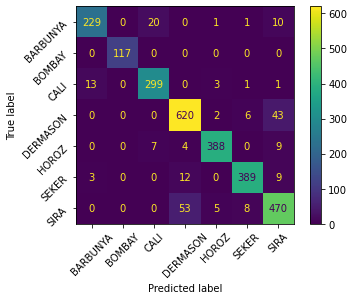

In [23]:
# Assuming y_test2 and y_pred3 are your ground truth and predicted labels, respectively
cm=ConfusionMatrixDisplay.from_predictions(y_test1, y_pred)
ay=plt.gca()
ay.set_xticklabels(ay.get_xticklabels(), fontsize=10, rotation=45)
ay.set_yticklabels(ay.get_yticklabels(), fontsize=10, rotation=45)
plt.show()

# Automatic detection output

In [24]:
# Create a DataFrame with ids and predictions, and save it as a CSV file
predictions = pd.DataFrame({
    'id': ids_test,
    'predicted_label': y_pred
})

predictions.to_csv('predictions.csv', index=False)

# Additional Task :Gaussian Naive Bayes

In [25]:
# Split the data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Create and train the model
model3 = GaussianNB()
model3.fit(X_train2, y_train2)


GaussianNB()

In [27]:
# Make predictions
y_pred3 = model3.predict(X_test2)
y_pred3

array(['SEKER', 'BARBUNYA', 'SEKER', ..., 'DERMASON', 'CALI', 'SEKER'],
      dtype='<U8')

In [28]:
f1_score

<function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [29]:
# Evaluate the model
acc2=accuracy_score(y_test2, y_pred3)
print(f'Accuracy: {acc2}')
prec2=precision_score(y_test2, y_pred3,average=None).mean()
print("Precision value :",prec2 )
rec2=recall_score(y_test2, y_pred3, average=None).mean()
print("Recall value :",rec2 )
f1_score_2=f1_score(y_test2, y_pred3, average=None).mean()
print("F1 Value :",f1_score_2 )


Accuracy: 0.7579875137715755
Precision value : 0.7630125373132769
Recall value : 0.7601284951266063
F1 Value : 0.759615717379627


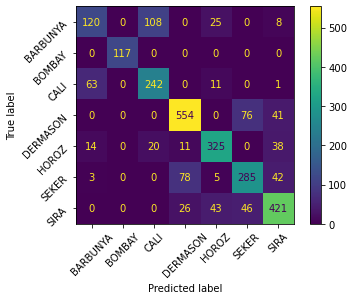

In [30]:
# Assuming y_test2 and y_pred3 are your ground truth and predicted labels, respectively
cm=ConfusionMatrixDisplay.from_predictions(y_test2, y_pred3)
ay=plt.gca()
ay.set_xticklabels(ay.get_xticklabels(), fontsize=10, rotation=45)
ay.set_yticklabels(ay.get_yticklabels(), fontsize=10, rotation=45)
plt.show()

# Comparison of Random Forest Versus GNB

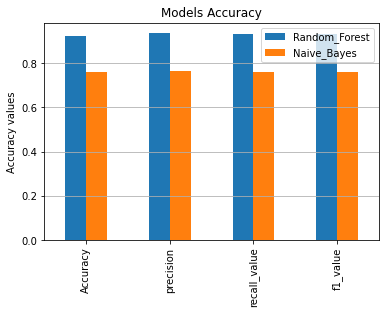

In [31]:
#plots accuracy
Random_Forest={'Accuracy':acc1,'precision':prec1,'recall_value':rec1,'f1_value':f1_score_1}
Naive_Bayes={'Accuracy':acc2,'precision':prec2,'recall_value':rec2,'f1_value':f1_score_2}
Models_accuracy = pd.DataFrame({'Random_Forest':pd.Series(Random_Forest),'Naive_Bayes':pd.Series(Naive_Bayes)})
Models_accuracy

ax = Models_accuracy.plot(kind='bar', figsize=(6,4), title='Models Accuracy',fontsize=10)
plt.ylabel('Accuracy values')

plt.grid(axis='y')

plt.show()